In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, silhouette_score, r2_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
data_path = 'german_credit_data.csv'
data = pd.read_csv(data_path)
data.shape


(1000, 10)

In [184]:
data.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [185]:
# Display dataset info
print("Initial dataset information:")
print(data.info())


Initial dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB
None


In [186]:
# Data Cleaning and Preprocessing
# Drop 'Unnamed' columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Statistical Summary
print("\n Statistical Summary:")
data.describe()


 Statistical Summary:


,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


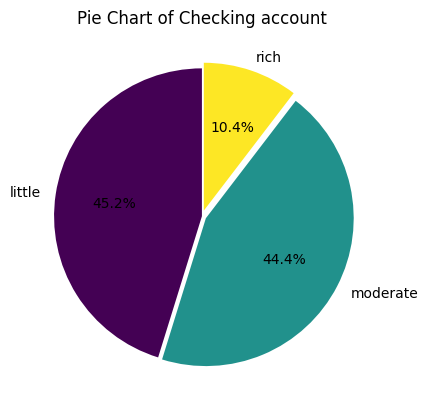

In [187]:
# Pie Chart Visualization
def plot_pie(data, column, explo):
    """
    Generates a pie chart for the specified column in the dataset.

    Parameters:
    data (DataFrame): The dataset containing the column.
    column (str): The column name for which the pie chart is to be plotted.
    """
    plt.figure()
    data[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', explode=explo)
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')  # Removes the y-axis label
    plt.show()

plot_pie(data, 'Checking account', (0,0.03,0.04))


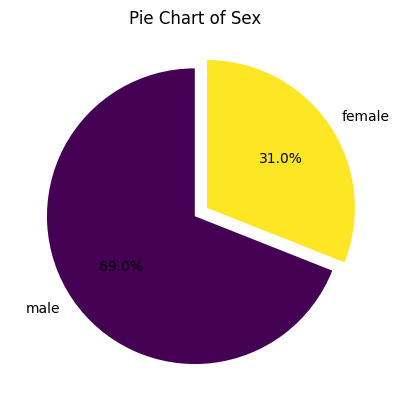

In [188]:
plot_pie(data, 'Sex', (0,0.1))

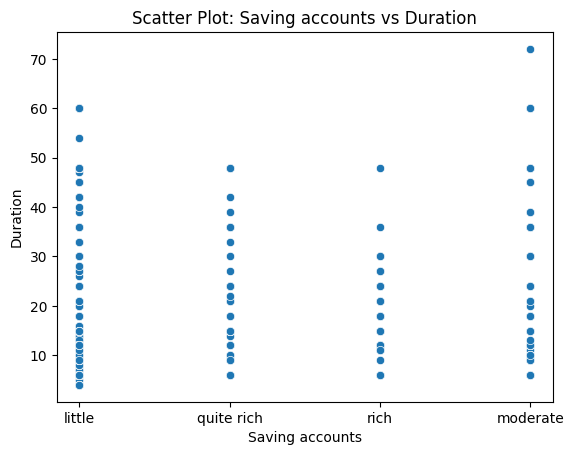

In [189]:
# Scatter Plot Visualization
def plot_scatter(data, x_col, y_col):
    """
    Generates a scatter plot for two specified columns in the dataset.

    Parameters:
    data (DataFrame): The dataset containing the columns.
    x_col (str): Column name for the x-axis.
    y_col (str): Column name for the y-axis.
    """
    plt.figure()
    sns.scatterplot(x=data[x_col], y=data[y_col])
    plt.title(f'Scatter Plot: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# Example Scatter Plot
plot_scatter(data, 'Saving accounts', 'Duration')

In [190]:
# Dropping rows with missing values and encoding categorical variables
cleaned_data = data.dropna()

# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for column in cleaned_data.select_dtypes(include=['object']).columns:
    cleaned_data.loc[:, column] = label_encoder.fit_transform(cleaned_data[column])

cleaned_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,0,2,1,0,1,5951,48,5
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
7,35,1,3,2,0,1,6948,36,1
9,28,1,3,1,0,1,5234,30,1


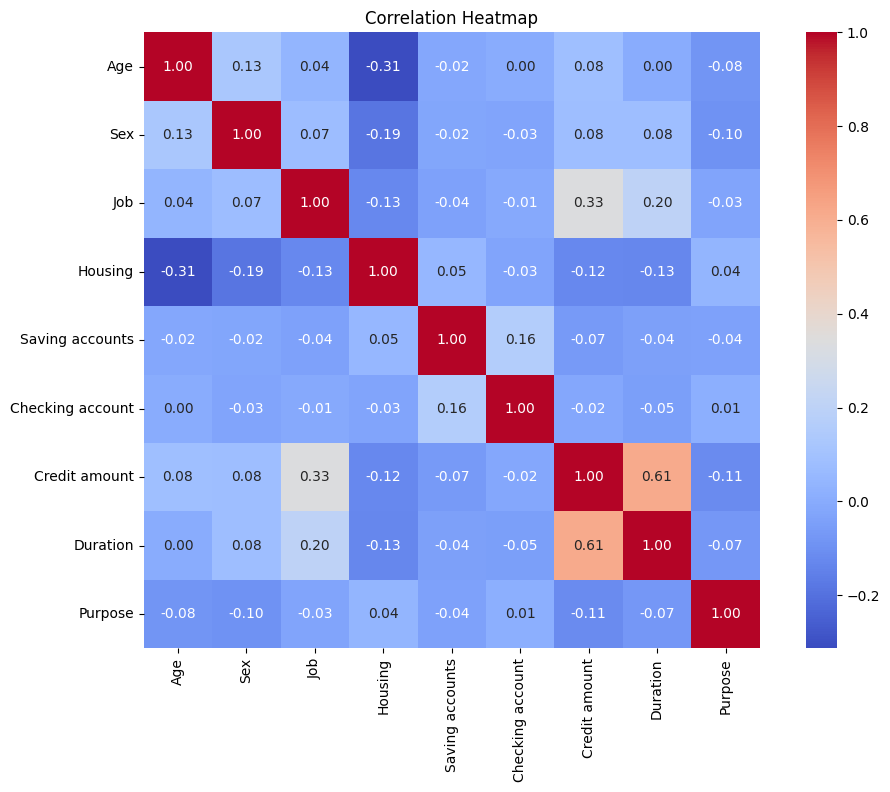

In [191]:
# Heatmap Visualization
def plot_heatmap(data):
    """
    Generates a heatmap for the correlation matrix of the dataset.

    Parameters:
    data
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

# Heatmap
plot_heatmap(cleaned_data)


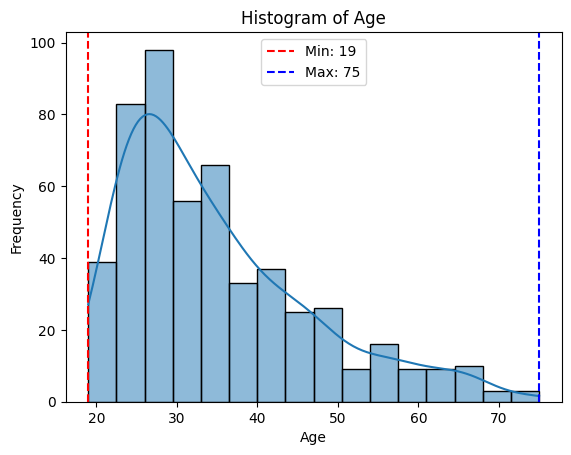

In [192]:
# Histogram Visualization
def plot_histogram(data, column):
    """
    Generates a histogram for a given column in the dataset and annotates it with the minimum and maximum values.

    Parameters:
    data (DataFrame): The dataset containing the column.
    column (str): The column name for which the histogram is to be plotted.
    """
    plt.figure()
    sns.histplot(data[column], kde=True)
    min_val = data[column].min()  # Calculate minimum value
    max_val = data[column].max()  # Calculate maximum value
    plt.axvline(min_val, color='red', linestyle='--', label=f'Min: {min_val}')  # Add a vertical line for the minimum
    plt.axvline(max_val, color='blue', linestyle='--', label=f'Max: {max_val}')  # Add a vertical line for the maximum
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Example Histogram (replace with an appropriate column)
plot_histogram(cleaned_data, 'Age')

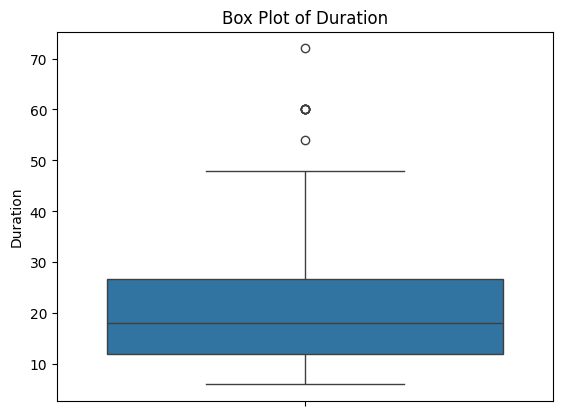

In [193]:
# Box Plot Visualization
def plot_box(data, column):
    """
    Generates a box plot for a specified column in the dataset.

    Parameters:
    data (DataFrame): The dataset containing the column.
    colu
    """
    plt.figure()
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

# Example Box Plot (replace with an appropriate column)
plot_box(cleaned_data, 'Duration')

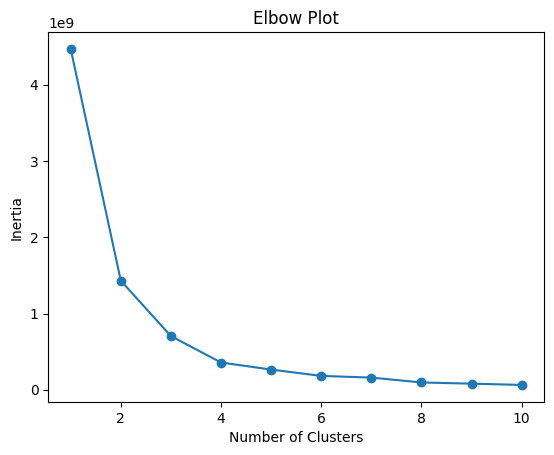

<ipython-input-194-510c12573f2c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster'] = kmeans_labels


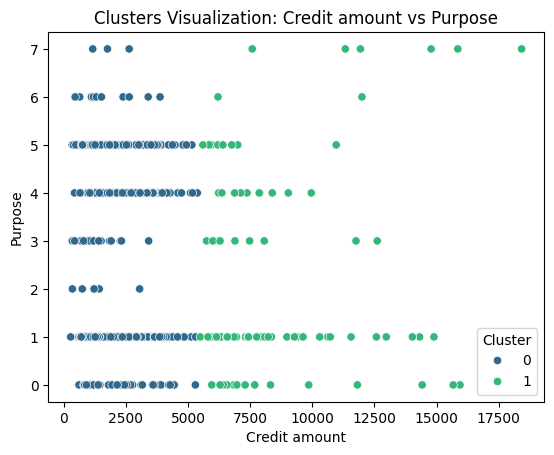

Silhouette Score for K-Means Clustering: 0.7169694832131507


In [194]:
# Elbow Plot for K-Means Clustering
def plot_elbow(data, max_clusters=10):
    """
    Plots the elbow plot to determine the optimal number of clusters.

    Parameters:
    data (DataFrame): The feature dataset to cluster.
    max_clusters (int): Maximum number of clusters to test.
    """
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    plt.figure()
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

# Apply clustering to the dataset
features = cleaned_data.iloc[:, :-1]
plot_elbow(features)

# Choose optimal number of clusters (e.g., k=2 based on the elbow plot)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

# Adding cluster labels to the dataset
cleaned_data['Cluster'] = kmeans_labels

# Visualizing Clusters with a scatter plot
def plot_clusters(data, x_col, y_col, labels):
    """
    Plots clusters in a scatter plot based on specified columns.

    Parameters:
    data (DataFrame): The dataset containing the features and labels.
    x_col (str): Column name for the x-axis.
    y_col (str): Column name for the y-axis.
    labels (array-like): Cluster labels for the data points.
    """
    plt.figure()
    sns.scatterplot(x=data[x_col], y=data[y_col], hue=labels, palette='viridis')
    plt.title(f'Clusters Visualization: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='Cluster')
    plt.show()

# Visualization for clustering
plot_clusters(cleaned_data, cleaned_data.columns[6], cleaned_data.columns[8], kmeans_labels)

# Silhouette Score for Clustering
sil_score = silhouette_score(features, kmeans_labels)
print(f"Silhouette Score for K-Means Clustering: {sil_score}")

Root Mean Squared Error (RMSE): 9.946586837926535
Mean Squared Error (MSE): 98.93458972441339
R-Squared Score (R²): 0.3644161295633641
Mean Absolute Percentage Error (MAPE): 39.221557577240226%
Skill Score: 0.36441612956336455


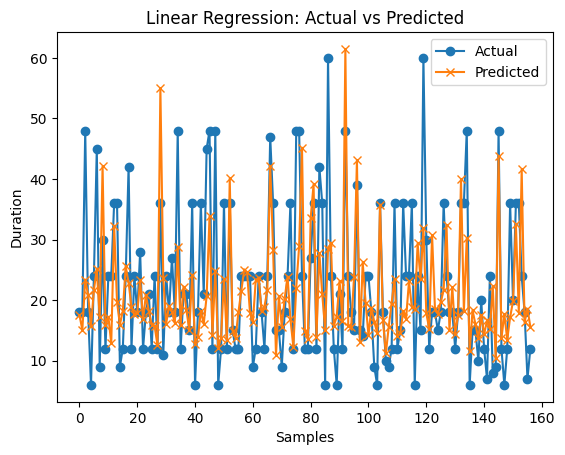

In [195]:
# Linear Regression Fitting
# Splitting data into train and test sets
X = cleaned_data.drop(columns=['Duration', 'Cluster'])  # Features excluding target and cluster
y = cleaned_data['Duration']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = linear_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
skill_score = 1 - (mse / np.var(y_test))

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared Score (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Skill Score: {skill_score}")

# Line Plot for Predictions vs Actual
def plot_fitting(y_actual, y_pred):
    """
    Plots actual vs predicted values for linear regression.

    Parameters:
    y_actual (array-like): Actual target values.
    y_pred (array-like): Predicted target values from the model.
    """
    plt.figure()
    plt.plot(y_actual.values, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.xlabel('Samples')
    plt.ylabel('Duration')
    plt.legend()
    plt.show()

plot_fitting(y_test, y_pred)